In [227]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os 

In [228]:
#importing data 
companies = pd.read_csv("E:\python_for_ai\python projects\linear regression\profit of company using linear regression/1000_Companies.csv")
X  = companies.iloc[: , :-1].values
Y = companies.iloc[:, 4].values

companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [229]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       ...,
       [100275.47, 241926.31, 227142.82, 'California'],
       [128456.23, 321652.14, 281692.32, 'California'],
       [161181.72, 270939.86, 295442.17, 'New York']], dtype=object)

In [230]:
type(X)

numpy.ndarray

In [231]:
companies.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

<AxesSubplot:>

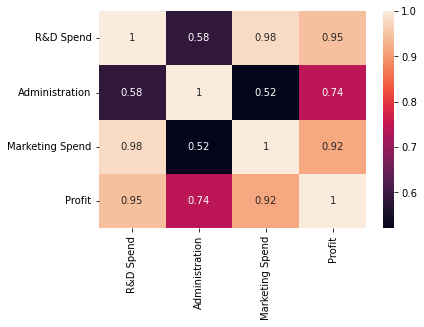

In [232]:
#data visualisation
sns.heatmap(companies.corr() , annot= True)

In [233]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [3])], remainder='passthrough')

X = np.array(columnTransformer.fit_transform(X))
X = X[:, 1:]
X = pd.DataFrame(X)

In [250]:
#Spliting data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X, Y , test_size = 0.3, random_state=40) 

In [251]:
#traning model 
from sklearn.linear_model import LinearRegression
model_fit = LinearRegression()
model_fit.fit(X_train , y_train)
X_train.shape

(700, 5)

In [252]:
X_train.head()

,0,1,2,3,4
154,1.0,0.0,103756.0,125780.2543,268976.5245
715,0.0,1.0,15132.0,112691.8583,97976.2745
680,0.0,1.0,57784.0,118990.8999,180273.425
129,0.0,1.0,73077.0,121249.4398,209781.3102
760,0.0,0.0,22449.0,113772.4662,112094.446


In [253]:
#predicting the data set 
y_pred = model_fit.predict(X_test)
y_pred

array([ 90153.55504548, 145567.48770503,  55239.70890463,  83859.49485781,
       178905.74463721,  59101.68201689, 131749.4654802 , 149838.51855157,
       108635.29725583,  97985.47912554, 110972.56809553, 184028.43549485,
       174329.61815987, 155467.26302845, 171954.30041158, 173830.5411457 ,
       163031.73739261, 155167.55424787, 118410.57473209,  53174.44119777,
        64167.4436944 , 160186.76984338,  95582.20340538, 173675.38756284,
       124022.21413322,  97202.69550809, 102903.23758309, 179874.63173652,
        58731.64487674,  85298.11262864, 164357.43786842,  90864.18832426,
       122251.74033967,  91431.36061281, 147484.87041055, 173798.52799117,
        63384.52576197, 100815.30637834,  59561.10878971,  61185.04869953,
       164747.90749916, 175979.6716724 , 109835.75820901,  54705.66636439,
        60949.35752105,  51664.40315288, 154599.52008786, 133339.78861602,
        86503.13809451, 108845.61640658, 135949.69491505, 104596.74189593,
       105313.89576635,  

In [254]:
#calculating the coefs
model_fit.coef_

array([-2.69540001e+02,  2.44677310e+02,  5.19248973e-01,  1.08971785e+00,
        9.42110048e-02])

In [255]:
#calculating intercept
model_fit.intercept_

-77863.97762590375

In [256]:
#calculating the error
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9837629290447826

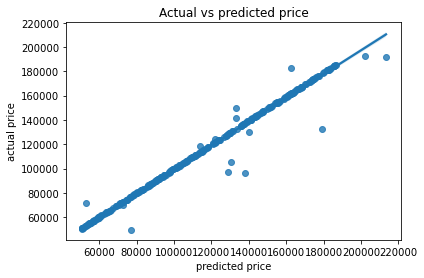

In [257]:
#plot final resutl 
sns.regplot(x=y_pred , y = y_test)
plt.xlabel("predicted price")
plt.ylabel("actual price")
plt.title("Actual vs predicted price")
plt.show()
